# 🐑 Eid Al-Adha 2025: Sheep Classification Challenge

Welcome to the **Eid Al-Adha 2025** sheep classification challenge on Kaggle!  
In this notebook, we build an AI model to classify 7 Arabian sheep breeds:

- **Naeimi**
- **Najdi**
- **Harri**
- **Goat**
- **Sawakni**
- **Roman**
- **Barbari**

## 📁 Dataset Overview
The dataset consists of:
- Images of sheep from 7 breeds
- A CSV file (`train_labels.csv`) mapping image filenames to labels

Our goal is to develop a model that accurately classifies each sheep into its correct breed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown

## 📥 Load Label Data

In [2]:
#1. Read CSV File
df = pd.read_csv('/kaggle/input/sheep-classification-challenge-2025/Sheep Classification Images/train_labels.csv')
display(Markdown("**Label Data Table:**"))
display(df.head())

**Label Data Table:**

,filename,label
0,39d30b68.jpg,Naeimi
1,4a9853bd.jpg,Goat
2,d88facaa.jpg,Roman
3,a3f4f4af.jpg,Roman
4,16b31730.jpg,Naeimi


## ⚖️ Temperature Balance Dataset by Class

In [3]:
def temperature_balance_dataframe(df: pd.DataFrame, temperature: float = 0.5) -> pd.DataFrame:
    """
    Balance dataframe using temperature balancing.
    The smallest class remains unchanged, other classes are reduced based on temperature.
    
    Args:
        df: Input dataframe with 'label' column
        temperature: Balance factor (0.0-1.0)
            1.0 = no balancing (keep original distribution)
            0.0 = full balancing (make all classes equal to smallest class)
            Values in between create proportional balancing
    
    Returns:
        Balanced dataframe
    """
    label_counts = df['label'].value_counts()
    min_count = label_counts.min()
    print(f"Minimum samples per label: {min_count}")
    print(f"Original distribution:\n{label_counts}")
    
    balanced_df = pd.DataFrame()
    
    for label in label_counts.index:
        label_df = df[df['label'] == label]
        current_count = len(label_df)
        
        if current_count == min_count:
            # Keep the smallest class as is
            sampled_label_df = label_df
        else:
            # Calculate target count with temperature balancing
            target_count = int(min_count + (current_count - min_count) * temperature)
            target_count = max(target_count, min_count)  # Ensure at least min_count
            
            # Sample the data
            sampled_label_df = label_df.sample(n=target_count, random_state=42)
        
        balanced_df = pd.concat([balanced_df, sampled_label_df])
    
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    print("\nLabel distribution after temperature balancing:")
    print(balanced_df['label'].value_counts())
    
    return balanced_df

def split_and_temperature_balance_data(df: pd.DataFrame, test_size: float = 0.05, random_state: int = 42, temperature: float = 0.5):
    # Pisahkan data menjadi training dan test set
    # Stratify=df['label'] memastikan distribusi label yang sama di kedua set
    train_df_raw, test_df = train_test_split(
        df,
        test_size=test_size,
        random_state=random_state,
        stratify=df['label'] # Penting untuk menjaga proporsi label di train dan test
    )

    print(f"\nOriginal training set size (before balancing): {len(train_df_raw)}")
    print(f"Test set size: {len(test_df)}")

    # Lakukan undersampling hanya pada training set
    balanced_train_df = temperature_balance_dataframe(train_df_raw.copy(),temperature)

    print("\nLabel distribution in the TEST SET (original distribution):")
    print(test_df['label'].value_counts())

    return balanced_train_df, test_df

In [4]:
## 2. Data Preparation
# Path to files and folders
train_csv_path = '/kaggle/input/sheep-classification-challenge-2025/Sheep Classification Images/train_labels.csv'
train_img_dir = '/kaggle/input/sheep-classification-challenge-2025/Sheep Classification Images/train/'
test_img_dir = '/kaggle/input/sheep-classification-challenge-2025/Sheep Classification Images/train/'

train_df, test_df = split_and_temperature_balance_data(df.copy(),0.1);


Original training set size (before balancing): 613
Test set size: 69
Minimum samples per label: 31
Original distribution:
label
Naeimi     229
Goat        96
Sawakni     72
Roman       65
Najdi       64
Harri       56
Barbari     31
Name: count, dtype: int64

Label distribution after temperature balancing:
label
Naeimi     130
Goat        63
Sawakni     51
Roman       48
Najdi       47
Harri       43
Barbari     31
Name: count, dtype: int64

Label distribution in the TEST SET (original distribution):
label
Naeimi     26
Goat       11
Sawakni     8
Roman       7
Najdi       7
Harri       6
Barbari     4
Name: count, dtype: int64


In [5]:
# 2. Pictures Display Function
def display_sample_images(image_folder='train', num_samples=5):
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # Show all images (in a larger grid)
    sample_df = df.sample(num_samples) if len(df) > num_samples else df
    
    for idx, (_, row) in enumerate(sample_df.iterrows(), 1):
        img_path = os.path.join(image_folder, row['filename'])
        
        try:
            plt.subplot(2, 3, idx) #2 صفوف، 3 أعمدة
            img = plt.imread(img_path)
            plt.imshow(img)
            plt.title(f"File: {row['filename']}\n Label: {row['label']}", fontsize=10)
            plt.axis('off')
        except FileNotFoundError:
            print(f"⚠️ File not found: {img_path}")
            continue
        except Exception as e:
            print(f"⚠️ Error processing {img_path}: {str(e)}")
            continue
    
    plt.show()


## 🖼️ Display Sample Images

**Pictures Examples:**

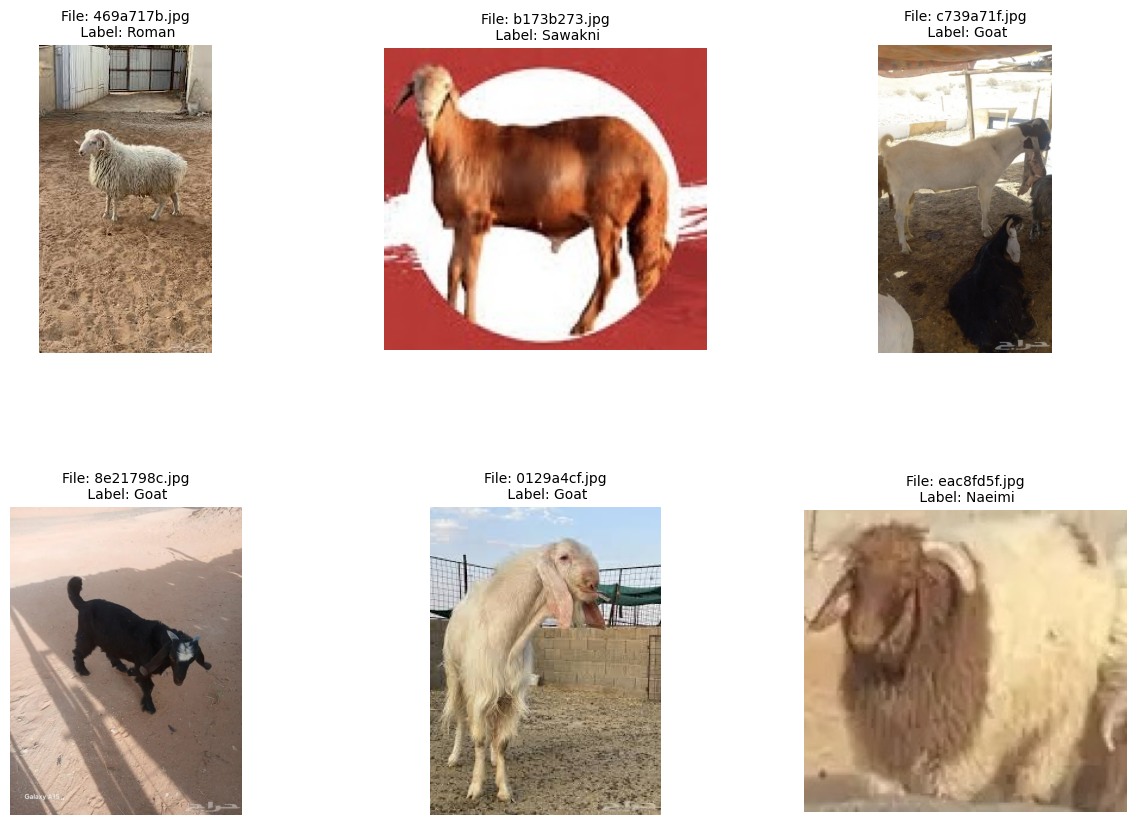

In [6]:
# 3. Show some pictures
display(Markdown("**Pictures Examples:**"))
display_sample_images(train_img_dir,num_samples=6) # Showing 6 images

In [7]:
#4. A simple analysis of the picture distribution
display(Markdown("**Picture Train Distribution:**"))
label_train_counts = train_df['label'].value_counts()
display(label_train_counts)

**Picture Train Distribution:**

label
Naeimi     130
Goat        63
Sawakni     51
Roman       48
Najdi       47
Harri       43
Barbari     31
Name: count, dtype: int64

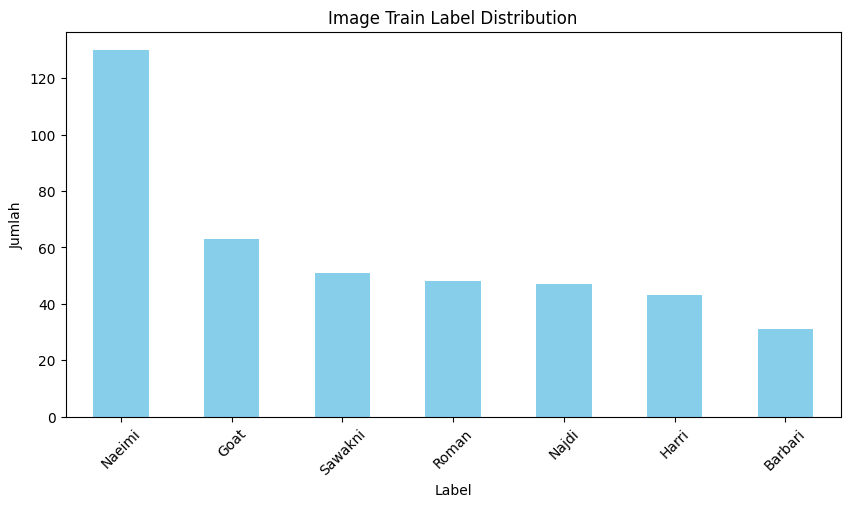

In [8]:
# Distribution visualization
plt.figure(figsize=(10, 5))
label_train_counts.plot(kind='bar', color='skyblue')
plt.title('Image Train Label Distribution')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [9]:
#4. A simple analysis of the picture distribution
display(Markdown("**Picture Test Distribution:**"))
label_test_counts = test_df['label'].value_counts()
display(label_test_counts)

**Picture Test Distribution:**

label
Naeimi     26
Goat       11
Sawakni     8
Roman       7
Najdi       7
Harri       6
Barbari     4
Name: count, dtype: int64

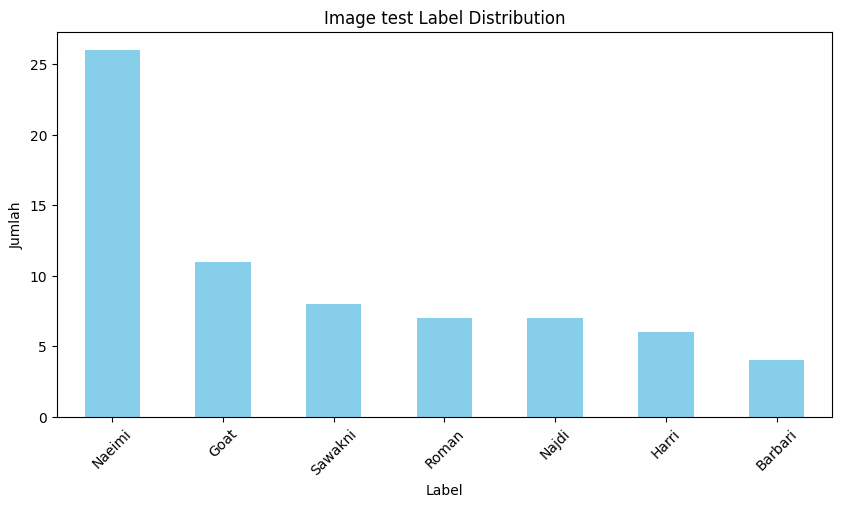

In [10]:
# Distribution visualization
plt.figure(figsize=(10, 5))
label_test_counts.plot(kind='bar', color='skyblue')
plt.title('Image test Label Distribution')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# CNN Program

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Set Device

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [13]:
# Encode labels to numeric
classes = train_df['label'].unique()
class_to_idx = {cls: i for i, cls in enumerate(classes)}
idx_to_class = {i: cls for i, cls in enumerate(classes)}

In [14]:
train_df['label_idx'] = train_df['label'].map(class_to_idx)
if test_df is not None:
    test_df['label_idx'] = test_df['label'].map(class_to_idx)


In [15]:
print(f"Num of class: {len(classes)}")
print(f"Mapping class: {class_to_idx}")

Num of class: 7
Mapping class: {'Barbari': 0, 'Harri': 1, 'Goat': 2, 'Najdi': 3, 'Roman': 4, 'Sawakni': 5, 'Naeimi': 6}


## Dataset Class

In [16]:
class ImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.dataframe.iloc[idx]['filename'])
        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx]['label_idx']
        
        if self.transform:
            image = self.transform(image)
            
        return image, label


In [17]:
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [18]:
val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

## Split Data (if there is no test data)

In [19]:
if test_df is None:
    train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label_idx'])


### Create dataset and dataloader

In [20]:
train_dataset = ImageDataset(train_df, train_img_dir, train_transforms)
test_dataset = ImageDataset(test_df, test_img_dir, val_transforms)


In [21]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Building a CNN Model

In [22]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            # Blok 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # Blok 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Blok 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Blok 4 (tambahan)
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Output akan selalu 256x1x1
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),  # output: 32
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [23]:
model = CNNModel(num_classes=len(classes)).to(device)

## Loss Function and Optimizer

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

## Training Loop with Clearer Accuracy Percentage Format

In [25]:
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=20):
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    print("\nStarting Training...")
    print(f"{'Epoch':<7} | {'Train Loss':<12} | {'Train Acc':<12} | {'Val Loss':<12} | {'Val Acc':<12} | Status")
    print("-" * 75)
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Training phase
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total  # Convert to percentage
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation phase
        val_loss, val_acc = evaluate_model(model, test_loader, criterion)
        val_acc_percent = 100 * val_acc  # Convert to percentage
        val_losses.append(val_loss)
        val_accs.append(val_acc_percent)
        
        # Determine if this is the best model so far
        is_best = val_acc_percent > best_acc
        if is_best:
            best_acc = val_acc_percent
            torch.save(model.state_dict(), 'best_model.pth')
            status = "✔ Best Model"
        else:
            status = ""
        
        # Print progress with clear percentage formatting
        print(f"{epoch+1:^7} | {train_loss:^12.4f} | {train_acc:^12.2f}% | {val_loss:^12.4f} | {val_acc_percent:^12.2f}% | {status}")
    
    print("\nTraining Completed!")
    print(f"Best Validation Accuracy: {best_acc:.2f}%")
    
    return train_losses, val_losses, train_accs, val_accs


In [26]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = running_loss / len(data_loader)
    accuracy = correct / total  # Return as fraction (0-1)
    
    # Print classification report every few epochs or at the end
    if len(all_preds) > 0:
        print("\nClassification Report:")
        print(classification_report(all_labels, all_preds, target_names=classes, digits=4))
    
    return avg_loss, accuracy

## Training Model

In [27]:
epochs = 90
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, test_loader, criterion, optimizer, epochs
)



Starting Training...
Epoch   | Train Loss   | Train Acc    | Val Loss     | Val Acc      | Status
---------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.3000    0.5455    0.3871        11
       Najdi     0.0000    0.0000    0.0000         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.0000    0.0000    0.0000         8
      Naeimi     0.4694    0.8846    0.6133        26

    accuracy                         0.4203        69
   macro avg     0.1099    0.2043    0.1429        69
weighted avg     0.2247    0.4203    0.2928        69

   1    |    1.8832    |    25.67    % |    1.9020    |    42.03    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.5000    0.0909    0.1538        11
       Najdi     1.0000    0.1429    0.2500         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.0000    0.0000    0.0000         8
      Naeimi     0.4127    1.0000    0.5843        26

    accuracy                         0.4058        69
   macro avg     0.2732    0.1763    0.1412        69
weighted avg     0.3367    0.4058    0.2700        69

   2    |    1.7739    |    37.77    % |    1.8026    |    40.58    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.1667    0.2500         6
        Goat     0.6000    0.2727    0.3750        11
       Najdi     0.2857    0.2857    0.2857         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.1250    0.2222         8
      Naeimi     0.4444    0.9231    0.6000        26

    accuracy                         0.4493        69
   macro avg     0.4043    0.2533    0.2476        69
weighted avg     0.4515    0.4493    0.3624        69

   3    |    1.6949    |    38.98    % |    1.6823    |    44.93    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     1.0000    0.1667    0.2857         6
        Goat     0.5556    0.4545    0.5000        11
       Najdi     0.2857    0.2857    0.2857         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.5000    0.1250    0.2000         8
      Naeimi     0.5000    0.9615    0.6579        26

    accuracy                         0.4928        69
   macro avg     0.4059    0.2848    0.2756        69
weighted avg     0.4509    0.4928    0.4046        69

   4    |    1.6325    |    41.89    % |    1.5906    |    49.28    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.1667    0.2500         6
        Goat     0.7143    0.4545    0.5556        11
       Najdi     0.3333    0.4286    0.3750         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.2500    0.4000         8
      Naeimi     0.5000    0.9231    0.6486        26

    accuracy                         0.5072        69
   macro avg     0.4354    0.3176    0.3185        69
weighted avg     0.4955    0.5072    0.4391        69

   5    |    1.5829    |    44.79    % |    1.5599    |    50.72    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.5455    0.5455    0.5455        11
       Najdi     0.4000    0.2857    0.3333         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.5000    0.3750    0.4286         8
      Naeimi     0.5000    0.8846    0.6389        26

    accuracy                         0.4928        69
   macro avg     0.2779    0.2987    0.2780        69
weighted avg     0.3739    0.4928    0.4112        69

   6    |    1.5374    |    44.79    % |    1.5055    |    49.28    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.5000    0.1818    0.2667        11
       Najdi     0.5000    0.4286    0.4615         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.5000    0.3750    0.4286         8
      Naeimi     0.4615    0.9231    0.6154        26

    accuracy                         0.4638        69
   macro avg     0.2802    0.2726    0.2532        69
weighted avg     0.3623    0.4638    0.3709        69

   7    |    1.5064    |    47.46    % |    1.4974    |    46.38    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.6667    0.5455    0.6000        11
       Najdi     0.5000    0.5714    0.5333         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.6250    0.6250    0.6250         8
      Naeimi     0.5366    0.8462    0.6567        26

    accuracy                         0.5362        69
   macro avg     0.3326    0.3697    0.3450        69
weighted avg     0.4317    0.5362    0.4697        69

   8    |    1.4937    |    45.52    % |    1.4661    |    53.62    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.3333    0.1818    0.2353        11
       Najdi     0.4000    0.5714    0.4706         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8333    0.6250    0.7143         8
      Naeimi     0.5333    0.9231    0.6761        26

    accuracy                         0.5072        69
   macro avg     0.3000    0.3288    0.2995        69
weighted avg     0.3913    0.5072    0.4228        69

   9    |    1.4613    |    47.94    % |    1.4083    |    50.72    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.4000    0.1818    0.2500        11
       Najdi     0.5000    0.2857    0.3636         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7143    0.6250    0.6667         8
      Naeimi     0.4906    1.0000    0.6582        26

    accuracy                         0.5072        69
   macro avg     0.3007    0.2989    0.2769        69
weighted avg     0.3822    0.5072    0.4021        69

  10    |    1.4316    |    49.15    % |    1.4086    |    50.72    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     1.0000    0.1667    0.2857         6
        Goat     0.5000    0.4545    0.4762        11
       Najdi     0.5000    0.4286    0.4615         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8000    0.5000    0.6154         8
      Naeimi     0.5106    0.9231    0.6575        26

    accuracy                         0.5362        69
   macro avg     0.4729    0.3533    0.3566        69
weighted avg     0.5026    0.5362    0.4667        69

  11    |    1.3944    |    47.70    % |    1.3696    |    53.62    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.3333    0.1667    0.2222         6
        Goat     0.5714    0.3636    0.4444        11
       Najdi     0.3846    0.7143    0.5000         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.6250    0.6250    0.6250         8
      Naeimi     0.5789    0.8462    0.6875        26

    accuracy                         0.5362        69
   macro avg     0.3562    0.3880    0.3542        69
weighted avg     0.4497    0.5362    0.4724        69

  12    |    1.3762    |    52.30    % |    1.3862    |    53.62    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.3333    0.1667    0.2222         6
        Goat     0.4000    0.1818    0.2500        11
       Najdi     0.5000    0.4286    0.4615         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8333    0.6250    0.7143         8
      Naeimi     0.4898    0.9231    0.6400        26

    accuracy                         0.5072        69
   macro avg     0.3652    0.3322    0.3269        69
weighted avg     0.4247    0.5072    0.4300        69

  13    |    1.3258    |    51.33    % |    1.3417    |    50.72    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.4000    0.3636    0.3810        11
       Najdi     0.4545    0.7143    0.5556         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.6250    0.6250    0.6250         8
      Naeimi     0.5789    0.8462    0.6875        26

    accuracy                         0.5217        69
   macro avg     0.2941    0.3642    0.3213        69
weighted avg     0.4005    0.5217    0.4486        69

  14    |    1.3305    |    54.96    % |    1.3272    |    52.17    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.4000    0.3636    0.3810        11
       Najdi     0.5000    0.7143    0.5882         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.6250    0.6250    0.6250         8
      Naeimi     0.5750    0.8846    0.6970        26

    accuracy                         0.5362        69
   macro avg     0.3000    0.3696    0.3273        69
weighted avg     0.4036    0.5362    0.4555        69

  15    |    1.2856    |    54.48    % |    1.3339    |    53.62    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.3333    0.4000         6
        Goat     0.5385    0.6364    0.5833        11
       Najdi     0.5000    0.7143    0.5882         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8333    0.6250    0.7143         8
      Naeimi     0.6389    0.8846    0.7419        26

    accuracy                         0.6087        69
   macro avg     0.4301    0.4562    0.4325        69
weighted avg     0.5174    0.6087    0.5498        69

  16    |    1.2835    |    54.00    % |    1.3044    |    60.87    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4000    0.3333    0.3636         6
        Goat     0.5556    0.4545    0.5000        11
       Najdi     0.5000    0.7143    0.5882         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7500    0.7500    0.7500         8
      Naeimi     0.6216    0.8846    0.7302        26

    accuracy                         0.5942        69
   macro avg     0.4039    0.4481    0.4189        69
weighted avg     0.4953    0.5942    0.5331        69

  17    |    1.2243    |    56.90    % |    1.3054    |    59.42    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.0000    0.0000    0.0000         6
        Goat     0.6250    0.4545    0.5263        11
       Najdi     0.6250    0.7143    0.6667         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.6154    1.0000    0.7619         8
      Naeimi     0.6000    0.8077    0.6885        26

    accuracy                         0.5652        69
   macro avg     0.3522    0.4252    0.3776        69
weighted avg     0.4605    0.5652    0.4993        69

  18    |    1.2357    |    55.45    % |    1.2913    |    56.52    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.3333    0.4000         6
        Goat     0.6429    0.8182    0.7200        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8571    0.7500    0.8000         8
      Naeimi     0.6216    0.8846    0.7302        26

    accuracy                         0.6522        69
   macro avg     0.4766    0.5001    0.4806        69
weighted avg     0.5520    0.6522    0.5899        69

  19    |    1.2067    |    57.63    % |    1.2128    |    65.22    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.3333    0.4000         6
        Goat     0.6000    0.5455    0.5714        11
       Najdi     0.5000    0.7143    0.5882         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.6667    0.7500    0.7059         8
      Naeimi     0.6111    0.8462    0.7097        26

    accuracy                         0.5942        69
   macro avg     0.4111    0.4556    0.4250        69
weighted avg     0.4974    0.5942    0.5348        69

  20    |    1.1782    |    58.84    % |    1.2279    |    59.42    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.3333    0.3333    0.3333         6
        Goat     0.6250    0.4545    0.5263        11
       Najdi     0.6250    0.7143    0.6667         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7778    0.8750    0.8235         8
      Naeimi     0.6316    0.9231    0.7500        26

    accuracy                         0.6232        69
   macro avg     0.4275    0.4715    0.4428        69
weighted avg     0.5202    0.6232    0.5586        69

  21    |    1.1511    |    59.32    % |    1.2211    |    62.32    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4000    0.3333    0.3636         6
        Goat     0.8571    0.5455    0.6667        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.5581    0.9231    0.6957        26

    accuracy                         0.6377        69
   macro avg     0.5034    0.4845    0.4815        69
weighted avg     0.5677    0.6377    0.5795        69

  22    |    1.1879    |    59.56    % |    1.1976    |    63.77    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.3333    0.4000         6
        Goat     0.7500    0.5455    0.6316        11
       Najdi     0.5556    0.7143    0.6250         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.7500    0.8571         8
      Naeimi     0.6098    0.9615    0.7463        26

    accuracy                         0.6377        69
   macro avg     0.4879    0.4721    0.4657        69
weighted avg     0.5651    0.6377    0.5795        69

  23    |    1.1534    |    61.74    % |    1.1811    |    63.77    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.5000    0.5000         6
        Goat     0.6154    0.7273    0.6667        11
       Najdi     0.5556    0.7143    0.6250         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7500    0.7500    0.7500         8
      Naeimi     0.6875    0.8462    0.7586        26

    accuracy                         0.6377        69
   macro avg     0.4441    0.5054    0.4715        69
weighted avg     0.5440    0.6377    0.5860        69

  24    |    1.1149    |    61.50    % |    1.1339    |    63.77    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.6667    0.5714         6
        Goat     0.7778    0.6364    0.7000        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.6316    0.9231    0.7500        26

    accuracy                         0.6812        69
   macro avg     0.5168    0.5451    0.5237        69
weighted avg     0.5914    0.6812    0.6234        69

  25    |    1.1085    |    61.26    % |    1.1359    |    68.12    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4545    0.8333    0.5882         6
        Goat     0.4444    0.3636    0.4000        11
       Najdi     0.4286    0.8571    0.5714         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8000    1.0000    0.8889         8
      Naeimi     0.8636    0.7308    0.7917        26

    accuracy                         0.6087        69
   macro avg     0.4273    0.5407    0.4629        69
weighted avg     0.5720    0.6087    0.5743        69

  26    |    1.0842    |    62.71    % |    1.2154    |    60.87    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4000    0.3333    0.3636         6
        Goat     0.7000    0.6364    0.6667        11
       Najdi     0.8333    0.7143    0.7692         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4545    0.8333    0.5882         6
        Goat     0.8750    0.6364    0.7368        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.6389    0.8846    0.7419        26

    accuracy                         0.6812        69
   macro avg     0.5253    0.5634    0.5302        69
weighted avg     0.6057    0.6812    0.6277        69

  28    |    1.0450    |    64.65    % |    1.1135    |    68.12    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5556    0.8333    0.6667         6
        Goat     0.6364    0.6364    0.6364        11
       Najdi     0.5556    0.7143    0.6250         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7778    0.8750    0.8235         8
      Naeimi     0.7097    0.8462    0.7719        26

    accuracy                         0.6667        69
   macro avg     0.4621    0.5579    0.5034        69
weighted avg     0.5637    0.6667    0.6092        69

  29    |    1.0857    |    62.23    % |    1.1172    |    66.67    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.5000    0.3333    0.4000         6
        Goat     0.7500    0.5455    0.6316        11
       Najdi     1.0000    0.4286    0.6000         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.5000    0.6667         8
      Naeimi     0.5102    0.9615    0.6667        26

    accuracy                         0.5797        69
   macro avg     0.5372    0.3956    0.4236        69
weighted avg     0.5727    0.5797    0.5248        69

  30    |    1.0051    |    64.16    % |    1.2884    |    57.97    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.4545    0.8333    0.5882         6
        Goat     0.7500    0.5455    0.6316        11
       Najdi     0.5556    0.7143    0.6250         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8000    1.0000    0.8889         8
      Naeimi     0.7500    0.8077    0.7778        26

    accuracy                         0.6667        69
   macro avg     0.5443    0.5930    0.5493        69
weighted avg     0.6198    0.6667    0.6307        69

  31    |    1.0400    |    63.20    % |    1.1391    |    66.67    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4545    0.8333    0.5882         6
        Goat     0.8571    0.5455    0.6667        11
       Najdi     0.5556    0.7143    0.6250         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.3750    0.5000    0.4286         6
        Goat     0.8182    0.8182    0.8182        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7778    0.8750    0.8235         8
      Naeimi     0.6471    0.8462    0.7333        26

    accuracy                         0.6667        69
   macro avg     0.4931    0.5362    0.5104        69
weighted avg     0.5816    0.6667    0.6175        69

  33    |    1.0137    |    65.38    % |    1.0512    |    66.67    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5000    0.8333    0.6250         6
        Goat     0.8000    0.3636    0.5000        11
       Najdi     0.5556    0.7143    0.6250         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.6571    0.8846    0.7541        26

    accuracy                         0.6522        69
   macro avg     0.5732    0.5601    0.5387        69
weighted avg     0.6199    0.6522    0.6092        69

  34    |    0.9876    |    66.10    % |    1.0992    |    65.22    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5000    0.8333    0.6250         6
        Goat     0.6667    0.7273    0.6957        11
       Najdi     0.6000    0.8571    0.7059         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.6250    0.8333    0.7143         6
        Goat     0.7000    0.6364    0.6667        11
       Najdi     0.8000    0.5714    0.6667         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.6216    0.8846    0.7302        26

    accuracy                         0.6812        69
   macro avg     0.6602    0.5634    0.5575        69
weighted avg     0.6842    0.6812    0.6380        69

  36    |    0.9670    |    67.07    % |    1.0054    |    68.12    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.4545    0.8333    0.5882         6
        Goat     0.8182    0.8182    0.8182        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.7188    0.8846    0.7931        26

    accuracy                         0.7101        69
   macro avg     0.5294    0.5893    0.5496        69
weighted avg     0.6292    0.7101    0.6611        69

  37    |    0.9338    |    67.31    % |    0.9612    |    71.01    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.0000    0.0000    0.0000         4
       Harri     0.3636    0.6667    0.4706         6
        Goat     1.0000    0.5455    0.7059        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.7778    0.8750    0.8235         8
      Naeimi     0.6286    0.8462    0.7213        26

    accuracy                         0.6377        69
   macro avg     0.4978    0.5211    0.4908        69
weighted avg     0.5905    0.6377    0.5932        69

  38    |    0.9602    |    66.83    % |    1.1261    |    63.77    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.2500    0.4000         4
       Harri     0.6250    0.8333    0.7143         6
        Goat     0.6429    0.8182    0.7200        11
       Najdi     0.5000    0.8571    0.6316         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.6250    0.7692         8
      Naeimi     0.8276    0.9231    0.8727        26

    accuracy                         0.7246        69
   macro avg     0.6565    0.6152    0.5868        69
weighted avg     0.6933    0.7246    0.6822        69

  39    |    0.9858    |    65.86    % |    1.0467    |    72.46    % | ✔ Best Model


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.6000    0.5000    0.5455         6
        Goat     0.7000    0.6364    0.6667        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.6316    0.9231    0.7500        26

    accuracy                         0.6812        69
   macro avg     0.5923    0.5570    0.5633        69
weighted avg     0.6191    0.6812    0.6363        69

  40    |    0.9149    |    68.28    % |    1.0184    |    68.12    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.2500    0.4000         4
       Harri     0.5000    0.8333    0.6250         6
        Goat     1.0000    0.6364    0.7778        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.6579    0.9615    0.7812        26

    accuracy                         0.7246        69
   macro avg     0.7130    0.6101    0.6124        69
weighted avg     0.7093    0.7246    0.6822        69

  41    |    0.9114    |    68.04    % |    1.0306    |    72.46    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.4615    1.0000    0.6316         6
        Goat     0.8889    0.7273    0.8000        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.7742    0.9231    0.8421        26

    accuracy                         0.7536        69
   macro avg     0.7797    0.6618    0.6514        69
weighted avg     0.8045    0.7536    0.7307        69

  42    |    0.8946    |    69.49    % |    0.9922    |    75.36    % | ✔ Best Model

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5000    0.8333    0.6250         6
        Goat     0.7273    0.7273    0.7273        11
       Najdi     0.8333    0.7143    0.7692         7

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.7500    0.7500    0.7500         4
       Harri     0.5556    0.8333    0.6667         6
        Goat     0.8889    0.7273    0.8000        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     0.8000    1.0000    0.8889         8
      Naeimi     0.7000    0.8077    0.7500        26

    accuracy                         0.7246        69
   macro avg     0.6298    0.6904    0.6528        69
weighted avg     0.6625    0.7246    0.6871        69

  44    |    0.8689    |    70.46    % |    0.9399    |    72.46    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5556    0.8333    0.6667         6
        Goat     0.8571    0.5455    0.6667        11
       Najdi     0.5556    0.7143    0.6250         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.6857    0.9231    0.7869        26

    accuracy                         0.6957        69
   macro avg     0.5934    0.5916    0.5731        69
weighted avg     0.6446    0.6957    0.6517        69

  45    |    0.8905    |    68.77    % |    0.9576    |    69.57    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.3333    0.2500    0.2857         4
       Harri     0.6667    0.6667    0.6667         6
        Goat     0.6667    0.7273    0.6957        11
       Najdi     0.6667    0.8571    0.7500         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     0.8889    1.0000    0.9412         8
      Naeimi     0.7931    0.8846    0.8364        26

    accuracy                         0.7391        69
   macro avg     0.7165    0.6469    0.6322        69
weighted avg     0.7546    0.7391    0.7112        69

  46    |    0.8821    |    66.59    % |    0.9568    |    73.91    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.2500    0.4000         4
       Harri     0.5000    0.8333    0.6250         6
        Goat     0.8750    0.6364    0.7368        11
       Najdi     0.8333    0.7143    0.7692         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.5000    0.5000         4
       Harri     0.7143    0.8333    0.7692         6
        Goat     0.8333    0.9091    0.8696        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.6970    0.8846    0.7797        26

    accuracy                         0.7536        69
   macro avg     0.6540    0.6738    0.6601        69
weighted avg     0.6871    0.7536    0.7145        69

  48    |    0.8475    |    70.94    % |    0.8832    |    75.36    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.6667    0.5000    0.5714         4
       Harri     0.5714    0.6667    0.6154         6
        Goat     0.7692    0.9091    0.8333        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.7333    0.8462    0.7857        26

    accuracy                         0.7391        69
   macro avg     0.7614    0.6649    0.6636        69
weighted avg     0.7627    0.7391    0.7148        69

  49    |    0.8369    |    70.46    % |    0.9132    |    73.91    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.2500    0.4000         4
       Harri     0.5000    0.8333    0.6250         6
        Goat     1.0000    0.7273    0.8421        11
       Najdi     0.8333    0.7143    0.7692         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.3333    0.5000    0.4000         4
       Harri     0.3846    0.8333    0.5263         6
        Goat     1.0000    0.6364    0.7778        11
       Najdi     0.6667    0.5714    0.6154         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.7931    0.8846    0.8364        26

    accuracy                         0.7101        69
   macro avg     0.7397    0.6348    0.6199        69
weighted avg     0.7961    0.7101    0.7041        69

  57    |    0.7689    |    72.40    % |    0.9727    |    71.01    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.2500    0.4000         4
       Harri     0.6000    0.5000    0.5455         6
        Goat     0.8571    0.5455    0.6667        11
       Najdi     0.8000    0.5714    0.6667         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.5000    0.5000         4
       Harri     0.6667    0.6667    0.6667         6
        Goat     0.8000    0.7273    0.7619        11
       Najdi     0.6000    0.8571    0.7059         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.7742    0.9231    0.8421        26

    accuracy                         0.7536        69
   macro avg     0.7630    0.6703    0.6657        69
weighted avg     0.7845    0.7536    0.7309        69

  59    |    0.7970    |    71.91    % |    0.8545    |    75.36    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.2500    0.4000         4
       Harri     0.5556    0.8333    0.6667         6
        Goat     0.9000    0.8182    0.8571        11
       Najdi     0.8333    0.7143    0.7692         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.3333    0.5000    0.4000         4
       Harri     0.6250    0.8333    0.7143         6
        Goat     1.0000    0.7273    0.8421        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     0.8000    1.0000    0.8889         8
      Naeimi     0.7586    0.8462    0.8000        26

    accuracy                         0.7391        69
   macro avg     0.7473    0.6806    0.6585        69
weighted avg     0.7856    0.7391    0.7219        69

  63    |    0.7638    |    73.85    % |    0.9429    |    73.91    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5714    0.6667    0.6154         6
        Goat     0.9000    0.8182    0.8571        11
       Najdi     0.7143    0.7143    0.7143         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.6667    0.5000    0.5714         4
       Harri     0.7143    0.8333    0.7692         6
        Goat     0.6667    0.9091    0.7692        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     1.0000    1.0000    1.0000         8
      Naeimi     0.7931    0.8846    0.8364        26

    accuracy                         0.7826        69
   macro avg     0.8106    0.7120    0.7094        69
weighted avg     0.8078    0.7826    0.7571        69

  67    |    0.7006    |    76.27    % |    0.7950    |    78.26    % | ✔ Best Model

Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.5000    0.6667         4
       Harri     0.4444    0.6667    0.5333         6
        Goat     1.0000    0.8182    0.9000        11
       Najdi     1.0000    0.7143    0.8333         7

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5556    0.8333    0.6667         6
        Goat     0.9000    0.8182    0.8571        11
       Najdi     0.8333    0.7143    0.7692         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     1.0000    0.8750    0.9333         8
      Naeimi     0.7353    0.9615    0.8333        26

    accuracy                         0.7681        69
   macro avg     0.7892    0.6565    0.6633        69
weighted avg     0.7998    0.7681    0.7396        69

  70    |    0.6739    |    77.97    % |    0.8092    |    76.81    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.3333    0.2500    0.2857         4
       Harri     0.5556    0.8333    0.6667         6
        Goat     0.9091    0.9091    0.9091        11
       Najdi     0.7500    0.8571    0.8000         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.2222    0.5000    0.3077         4
       Harri     0.6250    0.8333    0.7143         6
        Goat     0.6429    0.8182    0.7200        11
       Najdi     0.6667    0.8571    0.7500         7
       Roman     0.0000    0.0000    0.0000         7
     Sawakni     1.0000    1.0000    1.0000         8
      Naeimi     0.9048    0.7308    0.8085        26

    accuracy                         0.7101        69
   macro avg     0.5802    0.6771    0.6144        69
weighted avg     0.6942    0.7101    0.6914        69

  80    |    0.6437    |    80.39    % |    0.8806    |    71.01    % | 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.5000    0.6667         4
       Harri     0.5714    0.6667    0.6154         6
        Goat     0.7500    0.5455    0.6316        11
       Najdi     1.0000    0.7143    0.8333         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.6316    0.9231    0.7500        26

    accuracy                         0.7101        69
   macro avg     0.8326    0.6239    0.6603        69
weighted avg     0.7696    0.7101    0.6868        69

  81    |    0.6960    |    75.54    % |    0.9935    |    71.01    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     0.2500    0.2500    0.2500         4
       Harri     0.6000    1.0000    0.7500         6
        Goat     0.7143    0.9091    0.8000        11
       Najdi     0.8333    0.7143    0.7692         7
       Roma

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

     Barbari     0.5000    0.2500    0.3333         4
       Harri     0.5714    0.6667    0.6154         6
        Goat     0.9091    0.9091    0.9091        11
       Najdi     0.7143    0.7143    0.7143         7
       Roman     1.0000    0.1429    0.2500         7
     Sawakni     0.8750    0.8750    0.8750         8
      Naeimi     0.6970    0.8846    0.7797        26

    accuracy                         0.7391        69
   macro avg     0.7524    0.6346    0.6395        69
weighted avg     0.7616    0.7391    0.7108        69

  87    |    0.6154    |    77.72    % |    0.7149    |    73.91    % | 

Classification Report:
              precision    recall  f1-score   support

     Barbari     1.0000    0.5000    0.6667         4
       Harri     0.5000    0.6667    0.5714         6
        Goat     0.9000    0.8182    0.8571        11
       Najdi     1.0000    0.7143    0.8333         7
       Roma

## Plot Training Result

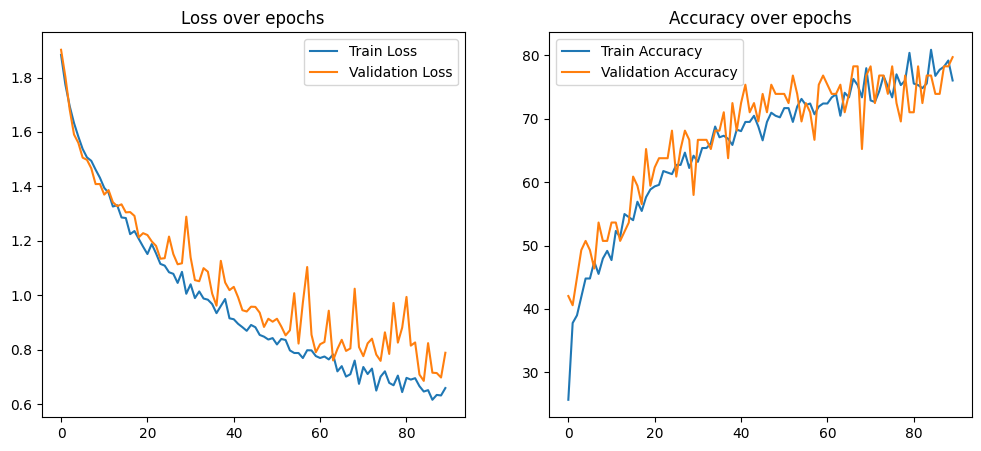

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()


## Prediction On New Image

In [29]:
def predict_image(img_path, model, transform):
    model.eval()
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        probabilities = torch.softmax(output, dim=1)
        confidence = torch.max(probabilities).item()
    
    predicted_class = idx_to_class[predicted.item()]
    
    # Tampilkan gambar dan prediksi
#    plt.imshow(Image.open(img_path))
#   plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    print(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
#    plt.axis('off')
#    plt.show()
    
    return predicted_class, confidence


In [30]:
# Prediction Example
sample_image = os.path.join(test_img_dir, test_df.iloc[0]['filename'])
predicted_class, confidence = predict_image(sample_image, model, val_transforms)
print("True Label: ", test_df.iloc[0]['label'])

Predicted: Harri
Confidence: 0.87
True Label:  Harri


# Create Submission

In [31]:
from pathlib import Path

test_dir = Path(f'/kaggle/input/sheep-classification-challenge-2025/Sheep Classification Images/test')
output_dir = Path(f'submission_output')
output_dir.mkdir(parents=True, exist_ok=True) 
submission_file = output_dir / 'submission.csv'

test_image_files = os.listdir(test_dir)

predictions = []

model.eval()

for image_file in test_image_files:
    image_path = test_dir / image_file
    try:
        predicted_class, confidence = predict_image(image_path, model, val_transforms)
        predictions.append({'filename': image_file, 'label': predicted_class})
    except UnidentifiedImageError:
        print(f"Skipping file {image_file} as it could not be identified as an image.")
    except Exception as e:
        print(f"Error processing file {image_file}: {e}")

# Create a DataFrame and save to CSV
submission_df = pd.DataFrame(predictions)
submission_df.to_csv(submission_file, index=False)

print(f"Submission file created at {submission_file}")
print(submission_df.head())

Predicted: Goat
Confidence: 0.35
Predicted: Naeimi
Confidence: 0.95
Predicted: Naeimi
Confidence: 0.71
Predicted: Goat
Confidence: 0.56
Predicted: Roman
Confidence: 0.29
Predicted: Harri
Confidence: 0.52
Predicted: Naeimi
Confidence: 0.67
Predicted: Najdi
Confidence: 0.43
Predicted: Sawakni
Confidence: 0.86
Predicted: Sawakni
Confidence: 0.99
Predicted: Sawakni
Confidence: 0.92
Predicted: Naeimi
Confidence: 0.46
Predicted: Najdi
Confidence: 0.98
Predicted: Najdi
Confidence: 0.61
Predicted: Najdi
Confidence: 0.91
Predicted: Goat
Confidence: 0.80
Predicted: Barbari
Confidence: 0.31
Predicted: Barbari
Confidence: 0.45
Predicted: Goat
Confidence: 0.32
Predicted: Barbari
Confidence: 0.58
Predicted: Barbari
Confidence: 0.76
Predicted: Naeimi
Confidence: 1.00
Predicted: Naeimi
Confidence: 0.64
Predicted: Najdi
Confidence: 0.61
Predicted: Najdi
Confidence: 0.92
Predicted: Najdi
Confidence: 0.97
Predicted: Barbari
Confidence: 0.51
Predicted: Najdi
Confidence: 0.78
Predicted: Barbari
Confidence: